### [Image Gradients](https://docs.opencv.org/3.4/d5/d0f/tutorial_py_gradients.html)
Learn to find image gradients, edges etc.

#### 목표
이 장에서는 다음을 배웁니다.

* 이미지 그라디언트, 가장자리 찾기 등
* 우리는 다음과 같은 함수를 볼 것입니다 : **[cv.Sobel()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d), [cv.Scharr()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaa13106761eedf14798f37aa2d60404c9) , [cv.Laplacian()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)** 등등

####  Theory
OpenCV는 **Sobel, Scharr 및 Laplacian**의 세 가지 유형의 그래디언트 필터 또는 하이 패스 필터를 제공합니다. 우리는 그들 각각을 볼 것입니다.

##### 1 Sobel and Scharr Derivatives

소벨 (Sobel) 연산자는 Gaussian 평활화 + 미분 연산이므로 더 노이즈에 강합니다. 취할 파생 방향, 수직 또는 수평 방향 ( 각각 yorder 및 xorder 인수)을 지정할 수 있습니다 . ksize 인수로 커널의 크기를 지정할 수도 있습니다 . ksize = -1 인 경우 3x3 Scharr 필터가 사용되어 3x3 소벨 필터보다 우수한 결과를 제공합니다. 사용 된 커널에 대한 문서를 참조하십시오.

##### Laplacian Derivatives
그것은 관계에 의해 주어진 이미지의 라플라시안을 계산합니다. \\( \Delta src = \frac{\partial ^2{src}}{\partial x^2} + \frac{\partial ^2{src}}{\partial y^2} \\) 여기서 각 미분은 소벨 파생어를 사용하여 구합니다. ksize = 1이면 다음 커널이 필터링에 사용됩니다. 여기서 각 파생어는 소벨 파생 상품을 사용하여 찾습니다. 경우 ksize = 1 , 다음 다음 커널은 필터링을 위해 사용된다 :

kernel = $$ kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix} $$

#### Code
아래의 코드는 모든 다이어그램의 연산자를 보여줍니다. 모든 커널은 5x5 크기입니다. np.uint8 유형으로 결과를 얻으려면 출력 이미지의 깊이가 -1로 전달됩니다.

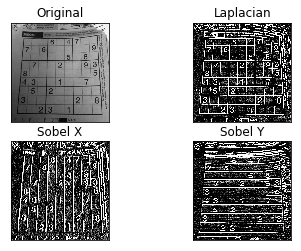

In [41]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.insert(0, '../common')
import bonghanUtil as u

img = cv.imread('../data/sudoku-original.jpg', 0)

laplacian = cv.Laplacian(img, cv.CV_8U, ksize = 5) #cv2.CV_64F
sobelx    = cv.Sobel(img    , cv.CV_8U, 1, 0, ksize = 5)
sobely    = cv.Sobel(img    , cv.CV_8U, 0, 1, ksize = 5)

'''
temp = cv.adaptiveThreshold(laplacian, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
u.showImage(laplacian)
u.showImage(temp)
'''

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

#### One Importan Matter!

마지막 예제에서 출력 데이터 유형은 cv.CV_8U 또는 np.uint8입니다. 하지만 약간의 문제가 있습니다. 화이트 투 블랙(Black/White) 전환은 네거티브 (Negative) 슬로프 (Negative Slope)로 간주되는 반면 블랙/화이트 전환은 포지티브 슬로프 (Positive Slope)로 간주됩니다. 따라서 데이터를 np.uint8로 변환하면 모든 음의 기울기가 0이됩니다. 간단히 말해서, 당신은 그 가장자리를 놓치고 있습니다.

두 모서리를 모두 감지하려면 출력 데이터 유형을 cv2.CV_16S, cv2.CV_64F 등의 상위 형식으로 유지하고 절대 값을 취한 다음 다시 cv.CV_8U로 변환하십시오. 아래 코드는 수평 소벨 필터와 결과의 차이에 대한이 절차를 보여줍니다.

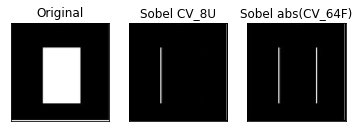

In [55]:
img = cv.imread('../data/box2.png', 0)

# Output dtype = cv2.CV_8U
sobelx8u = cv.Sobel(img, cv.CV_8U, 1, 0, ksize = 1)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv.Sobel(img , cv.CV_16S, 1, 0, ksize = 1)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1, 3, 1), plt.imshow(img, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(sobelx8u, cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(sobel_8u, cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

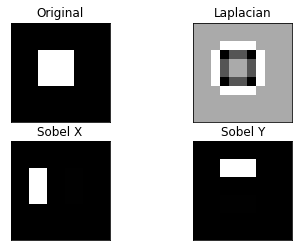

In [96]:
base = np.zeros((11, 11), np.float64)
base[3:7, 3:7] = 255

laplacian = cv.Laplacian(base, cv.CV_64F, ksize = 1) #cv2.CV_64F
sobelx    = cv.Sobel(base    , cv.CV_64F, 1, 0, ksize = 1)
sobelx = np.uint8(sobelx)
sobely    = cv.Sobel(base    , cv.CV_64F, 0, 1, ksize = 1)
sobely = np.uint8(sobely)

plt.subplot(2,2,1),plt.imshow(base, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

#### Additional Resources

#### Exercises